<center><h1> TD Réseaux de Neurones </h1></center>

Pour ce dernier TD vous allez devoir réaliser 2 modélisations différentes.
Une première pour une régression sur le jeu de données california housing et le second une classification de vêtement.

#### Préambule 

Jouer sur le [tensor sandbox](https://playground.tensorflow.org/) pour voir l'effet des hyperparamètres.


#### Première partie, régression

L'objectif est de jouer sur les hyperparamètres et de regarder l'impact sur les courbes d'apprentissages

1-) Charger le jeu de données Auto MPG disponible sur le site [UCI](https://archive.ics.uci.edu/ml/index.php)

2-) Adapter votre jeu de données pour faire une régression sous Keras

3-) Faites un premier modèle de régression avec Keras en utilisant l'API séquentiel

4-) Tester un modèle wide & deep

5-) Faire une cross-validation avec scikeras pour trouver le meilleur modèle

#### Seconde partie, classification

1-) Charger le jeu de données fashion mnist

2-) Visualiser le contenu du dataset, des images

3-) Transformer les features et créer un jeu de test et d'entrainement

4-) Réaliser des modèles de classification avec keras

In [66]:
#Get package
#On peut toujours faire son pré-processing avec sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV #RandomizedSearchCV marche aussi

In [64]:
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor

## Code

### 1) Import dataset

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

df = pd.read_csv(url, 
                 names=column_names,
                 na_values='?', 
                 comment='\t',
                 sep=' ', 
                 skipinitialspace=True
                 )

### 2) Adapter le jeu de données

In [7]:
#On regarde si il y a des NA
df.isna().sum()

#Il y a 6 NA, ici on ne se pose pas la question et on supprime

MPG             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [233]:
df_no_na = df.dropna(axis=0)

In [234]:
df_no_na

,MPG,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
#Afficher 5 premières lignes
df_no_na.head(5)

,MPG,cylinders,displacement,weight,acceleration,model_year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1


La variable origin semble être de nature catégorielle, il faut la recoder au bon format.
On va utiliser un one hot encoder avec sklearn

In [221]:
df_no_na.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [227]:
#Sk one hot encoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_no_na[['origin']])

In [13]:
one_hot_names = ['origin_1','origin_2','origin_3']
ohe_df = pd.DataFrame(transformed.toarray(), columns=one_hot_names)

In [228]:
#On joint l'encoding puis on supprime le feature de base
df_to_train = df_no_na.join(ohe_df).drop('origin',axis=1)

In [15]:
#Train and test
X_train , X_test, y_train, y_test = train_test_split(df_to_train.iloc[:,1:],
                                                     df_to_train.MPG,
                                                     test_size=0.2)

In [21]:
#Standardiser les features
scaler = StandardScaler()
scaler.fit(X_train)
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [36]:
#Clear session and set seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
#Initialisation du modèle
reg_model = keras.models.Sequential()
#Shape input, number of columns
reg_model.add(keras.layers.Input(shape=X_train.shape[1]))#input layer
reg_model.add(keras.layers.Dense(100, activation='relu'))#Hidden layer, 100 neurones
reg_model.add(keras.layers.Dense(1))#Output layer

#Compil model parameter
reg_model.compile(loss=keras.losses.mean_squared_error, 
                  optimizer=keras.optimizers.Adam(learning_rate=0.01)
                 )
#Fit model

In [46]:
history = reg_model.fit(X_train_sc, y_train,batch_size=24 ,epochs=50, validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 1s 20ms/step - loss: 532.5329 - val_loss: 359.2131
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 283.7870 - val_loss: 138.7195
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 76.8011 - val_loss: 43.5004
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 36.5006 - val_loss: 24.0460
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 19.5942 - val_loss: 12.1525
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 16.1579 - val_loss: 10.4143
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 13.0271 - val_loss: 10.0083
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 11.9283 - val_loss: 9.3099
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 11.1519 - val_loss: 8.2379
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 10.3850 - val_loss: 7.69

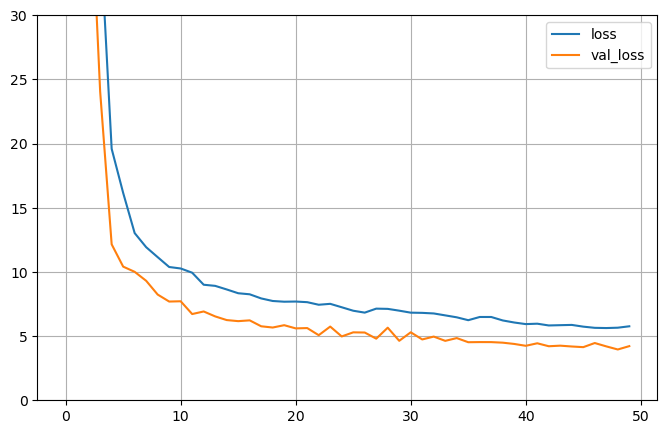

In [47]:
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 30) 
plt.show()

### Wide and Deep

In [104]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
#set seed
#Define first layer
input_ = keras.layers.Input(shape=X_train_sc.shape[1:])
#Hidden layer
hidden1 = keras.layers.Dense(100, activation="relu")(input_)
hidden2 = keras.layers.Dense(200, activation="relu")(hidden1)
#Concat first layer and output hidden
concat = keras.layers.Concatenate()([input_, hidden2])
#Output layer
output = keras.layers.Dense(1)(concat)
#define model
model = keras.Model(inputs=[input_], outputs=[output])
 

In [56]:
#Compil model parameter
model.compile(loss="mean_squared_error", 
                  optimizer=tf.optimizers.Adam(learning_rate=0.01))
#Fit model

In [57]:
wide_deep_history = model.fit(X_train_sc, y_train,batch_size=32 ,epochs=50, validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 18ms/step - loss: 331.9290 - val_loss: 100.5117
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 83.0216 - val_loss: 36.7685
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 53.4987 - val_loss: 16.6018
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 22.3129 - val_loss: 12.9952
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 14.2213 - val_loss: 13.1949
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 12.3568 - val_loss: 7.9317
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 9.4904 - val_loss: 6.0635
Epoch 8/50
8/8 [==============================] - 0s 7ms/step - loss: 8.7804 - val_loss: 6.3227
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 8.3280 - val_loss: 5.7922
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: 8.0481 - val_loss: 5.5039
Epoch 11/50
8/8 [========

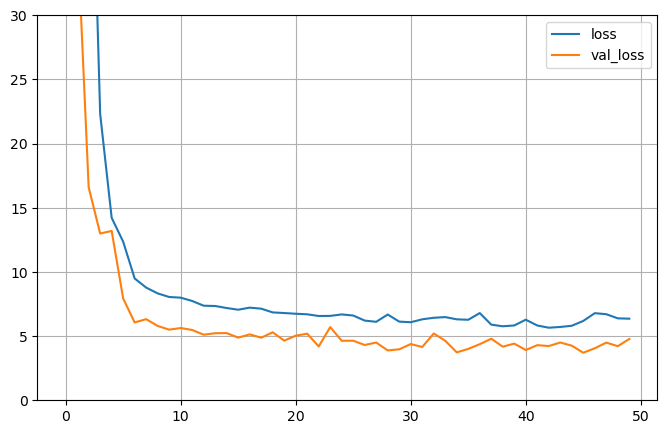

In [59]:
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(wide_deep_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 30) 
plt.show()

### Cross validation

In [69]:
def build_model(n_hidden, n_neurons, lr,input_shape):
    #Define sequential model
    model = keras.models.Sequential()
    #Input shape
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    #Add hidden layer with loop
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    #Ouput layer    
    model.add(keras.layers.Dense(1))
    #Define optimizer
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    #Compile model
    model.compile(loss="mse", optimizer=optimizer)
    return(model)

In [70]:
#Keras wrapper
keras_reg = KerasRegressor(build_model)

In [94]:
param_distribs = {
"model__n_hidden": [1, 2, 3],
"model__n_neurons":[50,100,200],
"model__lr":  [0.0001, 0.001, 0.1],
"model__input_shape":[X_train_sc.shape[1]],
"epochs":[30],
"batch_size":[24]
}

In [95]:
rnd_search_cv = GridSearchCV(keras_reg, param_distribs,cv=3, scoring='neg_mean_squared_error')
#Fit model with grid search
rnd_search_cv.fit(X_train_sc, y_train)

print(rnd_search_cv.best_params_, rnd_search_cv.best_score_)

Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 612.6090
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 611.4318
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 610.2497
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 609.0530
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 607.8760
Epoch 6/30
9/9 [==============================] - 0s 2ms/step - loss: 606.7038
Epoch 7/30
9/9 [==============================] - 0s 2ms/step - loss: 605.5052
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 604.3318
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 603.1697
Epoch 10/30
9/9 [==============================] - 0s 2ms/step - loss: 601.9626
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 600.7927
Epoch 12/30
9/9 [==============================] - 0s 2ms/step - loss: 599.6086
Epoch 13/30
9/9 [==============================] 

Epoch 12/30
9/9 [==============================] - 0s 1ms/step - loss: 605.7313
Epoch 13/30
9/9 [==============================] - 0s 1ms/step - loss: 604.1115
Epoch 14/30
9/9 [==============================] - 0s 1ms/step - loss: 602.3828
Epoch 15/30
9/9 [==============================] - 0s 2ms/step - loss: 600.7297
Epoch 16/30
9/9 [==============================] - 0s 1ms/step - loss: 599.0491
Epoch 17/30
9/9 [==============================] - 0s 1ms/step - loss: 597.3749
Epoch 18/30
9/9 [==============================] - 0s 1ms/step - loss: 595.7512
Epoch 19/30
9/9 [==============================] - 0s 1ms/step - loss: 594.0402
Epoch 20/30
9/9 [==============================] - 0s 1ms/step - loss: 592.3615
Epoch 21/30
9/9 [==============================] - 0s 1ms/step - loss: 590.7065
Epoch 22/30
9/9 [==============================] - 0s 1ms/step - loss: 589.0128
Epoch 23/30
9/9 [==============================] - 0s 1ms/step - loss: 587.3288
Epoch 24/30
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 569.5846
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 567.1153
Epoch 24/30
9/9 [==============================] - 0s 1ms/step - loss: 564.6530
Epoch 25/30
9/9 [==============================] - 0s 1ms/step - loss: 562.1277
Epoch 26/30
9/9 [==============================] - 0s 1ms/step - loss: 559.5802
Epoch 27/30
9/9 [==============================] - 0s 1ms/step - loss: 557.0847
Epoch 28/30
9/9 [==============================] - 0s 1ms/step - loss: 554.4634
Epoch 29/30
9/9 [==============================] - 0s 1ms/step - loss: 551.9230
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 602.1664
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 600.0035
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 597.7178
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 59

9/9 [==============================] - 0s 1ms/step - loss: 596.7607
Epoch 3/30
9/9 [==============================] - 0s 1ms/step - loss: 593.6381
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 590.5049
Epoch 5/30
9/9 [==============================] - 0s 1ms/step - loss: 587.3450
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 584.1678
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 580.9138
Epoch 8/30
9/9 [==============================] - 0s 1ms/step - loss: 577.6635
Epoch 9/30
9/9 [==============================] - 0s 1ms/step - loss: 574.3283
Epoch 10/30
9/9 [==============================] - 0s 1ms/step - loss: 570.8739
Epoch 11/30
9/9 [==============================] - 0s 1ms/step - loss: 567.4921
Epoch 12/30
9/9 [==============================] - 0s 1ms/step - loss: 563.9408
Epoch 13/30
9/9 [==============================] - 0s 1ms/step - loss: 560.4691
Epoch 14/30
9/9 [==============================] - 0s 1ms/s

9/9 [==============================] - 0s 2ms/step - loss: 555.6102
Epoch 14/30
9/9 [==============================] - 0s 2ms/step - loss: 550.1682
Epoch 15/30
9/9 [==============================] - 0s 1ms/step - loss: 544.6080
Epoch 16/30
9/9 [==============================] - 0s 1ms/step - loss: 538.8527
Epoch 17/30
9/9 [==============================] - 0s 1ms/step - loss: 533.0051
Epoch 18/30
9/9 [==============================] - 0s 1ms/step - loss: 526.9245
Epoch 19/30
9/9 [==============================] - 0s 2ms/step - loss: 520.4758
Epoch 20/30
9/9 [==============================] - 0s 2ms/step - loss: 513.9518
Epoch 21/30
9/9 [==============================] - 0s 1ms/step - loss: 507.2139
Epoch 22/30
9/9 [==============================] - 0s 2ms/step - loss: 500.2571
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 492.9085
Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss: 485.4654
Epoch 25/30
9/9 [==============================] - 0

Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss: 288.6690
Epoch 25/30
9/9 [==============================] - 0s 2ms/step - loss: 270.6115
Epoch 26/30
9/9 [==============================] - 0s 2ms/step - loss: 253.2828
Epoch 27/30
9/9 [==============================] - 0s 2ms/step - loss: 235.9145
Epoch 28/30
9/9 [==============================] - 0s 2ms/step - loss: 218.8709
Epoch 29/30
9/9 [==============================] - 0s 2ms/step - loss: 202.5478
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 610.6313
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 601.3312
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 591.7590
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 582.0629
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 571.8101
Epoch 6/30
9/9 [==============================] - 0s 2ms/step 

9/9 [==============================] - 0s 1ms/step - loss: 611.6252
Epoch 5/30
9/9 [==============================] - 0s 1ms/step - loss: 609.1526
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 606.6805
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 604.0828
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 601.3796
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 598.5259
Epoch 10/30
9/9 [==============================] - 0s 2ms/step - loss: 595.5537
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 592.4443
Epoch 12/30
9/9 [==============================] - 0s 2ms/step - loss: 589.1082
Epoch 13/30
9/9 [==============================] - 0s 2ms/step - loss: 585.6467
Epoch 14/30
9/9 [==============================] - 0s 2ms/step - loss: 581.8841
Epoch 15/30
9/9 [==============================] - 0s 2ms/step - loss: 577.9152
Epoch 16/30
9/9 [==============================] - 0s 2ms

9/9 [==============================] - 0s 2ms/step - loss: 429.2759
Epoch 16/30
9/9 [==============================] - 0s 2ms/step - loss: 402.2274
Epoch 17/30
9/9 [==============================] - 0s 2ms/step - loss: 373.5573
Epoch 18/30
9/9 [==============================] - 0s 2ms/step - loss: 342.8131
Epoch 19/30
9/9 [==============================] - 0s 2ms/step - loss: 310.1671
Epoch 20/30
9/9 [==============================] - 0s 2ms/step - loss: 277.1301
Epoch 21/30
9/9 [==============================] - 0s 2ms/step - loss: 243.5052
Epoch 22/30
9/9 [==============================] - 0s 2ms/step - loss: 210.4815
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 177.8450
Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss: 148.7742
Epoch 25/30
9/9 [==============================] - 0s 2ms/step - loss: 121.3225
Epoch 26/30
9/9 [==============================] - 0s 2ms/step - loss: 98.8914
Epoch 27/30
9/9 [==============================] - 0s

9/9 [==============================] - 0s 3ms/step - loss: 19.9880
Epoch 27/30
9/9 [==============================] - 0s 3ms/step - loss: 18.7657
Epoch 28/30
9/9 [==============================] - 0s 3ms/step - loss: 17.5405
Epoch 29/30
9/9 [==============================] - 0s 3ms/step - loss: 16.6596
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 0s 1ms/step - loss: 621.4905
Epoch 2/30
9/9 [==============================] - 0s 1ms/step - loss: 609.8948
Epoch 3/30
9/9 [==============================] - 0s 1ms/step - loss: 598.2272
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 586.4427
Epoch 5/30
9/9 [==============================] - 0s 1ms/step - loss: 574.6157
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 562.6465
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 550.0843
Epoch 8/30
9/9 [==============================] - 0s 1ms/step - loss: 537.4637
E

9/9 [==============================] - 0s 1ms/step - loss: 547.3729
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 529.3474
Epoch 8/30
9/9 [==============================] - 0s 1ms/step - loss: 510.5493
Epoch 9/30
9/9 [==============================] - 0s 1ms/step - loss: 490.9055
Epoch 10/30
9/9 [==============================] - 0s 1ms/step - loss: 468.9109
Epoch 11/30
9/9 [==============================] - 0s 1ms/step - loss: 446.7154
Epoch 12/30
9/9 [==============================] - 0s 1ms/step - loss: 422.8511
Epoch 13/30
9/9 [==============================] - 0s 1ms/step - loss: 399.2168
Epoch 14/30
9/9 [==============================] - 0s 1ms/step - loss: 373.2706
Epoch 15/30
9/9 [==============================] - 0s 1ms/step - loss: 347.8674
Epoch 16/30
9/9 [==============================] - 0s 1ms/step - loss: 321.9005
Epoch 17/30
9/9 [==============================] - 0s 1ms/step - loss: 295.7477
Epoch 18/30
9/9 [==============================] - 0s 1

9/9 [==============================] - 0s 1ms/step - loss: 119.5923
Epoch 18/30
9/9 [==============================] - 0s 1ms/step - loss: 98.8775
Epoch 19/30
9/9 [==============================] - 0s 1ms/step - loss: 81.5188
Epoch 20/30
9/9 [==============================] - 0s 1ms/step - loss: 68.0833
Epoch 21/30
9/9 [==============================] - 0s 1ms/step - loss: 57.1687
Epoch 22/30
9/9 [==============================] - 0s 1ms/step - loss: 48.8387
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 42.3180
Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss: 37.2342
Epoch 25/30
9/9 [==============================] - 0s 1ms/step - loss: 32.8290
Epoch 26/30
9/9 [==============================] - 0s 1ms/step - loss: 29.5909
Epoch 27/30
9/9 [==============================] - 0s 1ms/step - loss: 26.4894
Epoch 28/30
9/9 [==============================] - 0s 1ms/step - loss: 24.4181
Epoch 29/30
9/9 [==============================] - 0s 1ms/step 

9/9 [==============================] - 0s 1ms/step - loss: 10.5400
Epoch 29/30
9/9 [==============================] - 0s 1ms/step - loss: 10.2849
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 581.5710
Epoch 2/30
9/9 [==============================] - 0s 1ms/step - loss: 554.8693
Epoch 3/30
9/9 [==============================] - 0s 1ms/step - loss: 524.2304
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 489.0305
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 446.6244
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 397.2474
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 338.1671
Epoch 8/30
9/9 [==============================] - 0s 1ms/step - loss: 274.8188
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 210.5939
Epoch 10/30
9/9 [==============================] - 0s 3ms/step - loss: 149.0822


9/9 [==============================] - 0s 1ms/step - loss: 33.0890
Epoch 10/30
9/9 [==============================] - 0s 1ms/step - loss: 23.8582
Epoch 11/30
9/9 [==============================] - 0s 1ms/step - loss: 20.4945
Epoch 12/30
9/9 [==============================] - 0s 1ms/step - loss: 16.3191
Epoch 13/30
9/9 [==============================] - 0s 2ms/step - loss: 14.3780
Epoch 14/30
9/9 [==============================] - 0s 2ms/step - loss: 13.2025
Epoch 15/30
9/9 [==============================] - 0s 1ms/step - loss: 12.3308
Epoch 16/30
9/9 [==============================] - 0s 2ms/step - loss: 11.6429
Epoch 17/30
9/9 [==============================] - 0s 1ms/step - loss: 11.1454
Epoch 18/30
9/9 [==============================] - 0s 1ms/step - loss: 10.6676
Epoch 19/30
9/9 [==============================] - 0s 1ms/step - loss: 10.2568
Epoch 20/30
9/9 [==============================] - 0s 2ms/step - loss: 9.9515
Epoch 21/30
9/9 [==============================] - 0s 2ms/step - 

9/9 [==============================] - 0s 2ms/step - loss: 7.5544
Epoch 22/30
9/9 [==============================] - 0s 2ms/step - loss: 7.5286
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 7.3183
Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss: 7.3078
Epoch 25/30
9/9 [==============================] - 0s 2ms/step - loss: 7.1056
Epoch 26/30
9/9 [==============================] - 0s 2ms/step - loss: 7.0175
Epoch 27/30
9/9 [==============================] - 0s 2ms/step - loss: 6.8850
Epoch 28/30
9/9 [==============================] - 0s 2ms/step - loss: 6.8537
Epoch 29/30
9/9 [==============================] - 0s 2ms/step - loss: 6.8126
Epoch 30/30
5/5 [==============================] - 0s 1ms/step
Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 569.3415
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 467.5609
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 331.7659
Epoch 4/30

Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 508.8842
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 435.5894
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 329.4796
Epoch 6/30
9/9 [==============================] - 0s 2ms/step - loss: 205.8078
Epoch 7/30
9/9 [==============================] - 0s 2ms/step - loss: 102.2621
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 52.2906
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 39.7053
Epoch 10/30
9/9 [==============================] - 0s 2ms/step - loss: 26.6877
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 20.9874
Epoch 12/30
9/9 [==============================] - 0s 2ms/step - loss: 17.9478
Epoch 13/30
9/9 [==============================] - 0s 1ms/step - loss: 16.5125
Epoch 14/30
9/9 [==============================] - 0s 1ms/step - loss: 15.5226
Epoch 15/30
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 2ms/step - loss: 9.4937
Epoch 16/30
9/9 [==============================] - 0s 2ms/step - loss: 9.0287
Epoch 17/30
9/9 [==============================] - 0s 2ms/step - loss: 8.7235
Epoch 18/30
9/9 [==============================] - 0s 2ms/step - loss: 8.7060
Epoch 19/30
9/9 [==============================] - 0s 2ms/step - loss: 8.2139
Epoch 20/30
9/9 [==============================] - 0s 2ms/step - loss: 7.9744
Epoch 21/30
9/9 [==============================] - 0s 2ms/step - loss: 7.7861
Epoch 22/30
9/9 [==============================] - 0s 2ms/step - loss: 7.5206
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 7.4365
Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss: 7.1930
Epoch 25/30
9/9 [==============================] - 0s 2ms/step - loss: 7.0616
Epoch 26/30
9/9 [==============================] - 0s 2ms/step - loss: 7.0140
Epoch 27/30
9/9 [==============================] - 0s 2ms/step - loss: 6.814

9/9 [==============================] - 0s 3ms/step - loss: 6.0762
Epoch 29/30
9/9 [==============================] - 0s 3ms/step - loss: 6.5950
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 0s 1ms/step - loss: 269.1946
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 50.3571
Epoch 3/30
9/9 [==============================] - 0s 1ms/step - loss: 24.5635
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 14.7497
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 10.4342
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 8.6733
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 7.7036
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 6.8529
Epoch 9/30
9/9 [==============================] - 0s 1ms/step - loss: 6.3925
Epoch 10/30
9/9 [==============================] - 0s 1ms/step - loss: 6.4130
Epoch 11/30
9/9 

9/9 [==============================] - 0s 2ms/step - loss: 7.1057
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 7.0338
Epoch 12/30
9/9 [==============================] - 0s 2ms/step - loss: 6.0428
Epoch 13/30
9/9 [==============================] - 0s 1ms/step - loss: 6.2959
Epoch 14/30
9/9 [==============================] - 0s 2ms/step - loss: 7.9313
Epoch 15/30
9/9 [==============================] - 0s 2ms/step - loss: 7.5256
Epoch 16/30
9/9 [==============================] - 0s 2ms/step - loss: 7.0383
Epoch 17/30
9/9 [==============================] - 0s 2ms/step - loss: 6.6378
Epoch 18/30
9/9 [==============================] - 0s 2ms/step - loss: 7.6903
Epoch 19/30
9/9 [==============================] - 0s 2ms/step - loss: 7.1504
Epoch 20/30
9/9 [==============================] - 0s 1ms/step - loss: 5.3293
Epoch 21/30
9/9 [==============================] - 0s 1ms/step - loss: 5.0565
Epoch 22/30
9/9 [==============================] - 0s 2ms/step - loss: 6.084

9/9 [==============================] - 0s 1ms/step - loss: 8.2429
Epoch 24/30
9/9 [==============================] - 0s 1ms/step - loss: 6.2334
Epoch 25/30
9/9 [==============================] - 0s 1ms/step - loss: 5.4740
Epoch 26/30
9/9 [==============================] - 0s 1ms/step - loss: 5.1898
Epoch 27/30
9/9 [==============================] - 0s 2ms/step - loss: 5.0823
Epoch 28/30
9/9 [==============================] - 0s 1ms/step - loss: 5.1168
Epoch 29/30
9/9 [==============================] - 0s 1ms/step - loss: 5.6197
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 1s 3ms/step - loss: 174.7551
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 25.4175
Epoch 3/30
9/9 [==============================] - 0s 1ms/step - loss: 20.5465
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 11.7143
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 9.6313
Epoch 6/30
9/

9/9 [==============================] - 0s 1ms/step - loss: 12.0301
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 10.9518
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 9.9634
Epoch 8/30
9/9 [==============================] - 0s 1ms/step - loss: 7.3134
Epoch 9/30
9/9 [==============================] - 0s 1ms/step - loss: 6.7295
Epoch 10/30
9/9 [==============================] - 0s 1ms/step - loss: 7.7391
Epoch 11/30
9/9 [==============================] - 0s 1ms/step - loss: 7.9676
Epoch 12/30
9/9 [==============================] - 0s 2ms/step - loss: 6.3585
Epoch 13/30
9/9 [==============================] - 0s 1ms/step - loss: 6.9927
Epoch 14/30
9/9 [==============================] - 0s 1ms/step - loss: 5.8532
Epoch 15/30
9/9 [==============================] - 0s 1ms/step - loss: 6.0733
Epoch 16/30
9/9 [==============================] - 0s 2ms/step - loss: 7.0907
Epoch 17/30
9/9 [==============================] - 0s 1ms/step - loss: 9.7406


9/9 [==============================] - 0s 2ms/step - loss: 6.8916
Epoch 19/30
9/9 [==============================] - 0s 2ms/step - loss: 6.8281
Epoch 20/30
9/9 [==============================] - 0s 2ms/step - loss: 9.9002
Epoch 21/30
9/9 [==============================] - 0s 2ms/step - loss: 13.7853
Epoch 22/30
9/9 [==============================] - 0s 2ms/step - loss: 8.6083
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 12.4674
Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss: 9.2558
Epoch 25/30
9/9 [==============================] - 0s 2ms/step - loss: 11.5628
Epoch 26/30
9/9 [==============================] - 0s 2ms/step - loss: 12.1658
Epoch 27/30
9/9 [==============================] - 0s 2ms/step - loss: 14.7620
Epoch 28/30
9/9 [==============================] - 0s 2ms/step - loss: 10.9317
Epoch 29/30
9/9 [==============================] - 0s 2ms/step - loss: 8.8612
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1

5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 1s 2ms/step - loss: 869.9679
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 333.7972
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 203.2157
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 86.4261
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 44.1300
Epoch 6/30
9/9 [==============================] - 0s 2ms/step - loss: 22.3517
Epoch 7/30
9/9 [==============================] - 0s 2ms/step - loss: 14.7205
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 13.0671
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 10.7771
Epoch 10/30
9/9 [==============================] - 0s 2ms/step - loss: 9.4459
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 9.3031
Epoch 12/30
9/9 [==============================] - 0s 3ms/step - loss: 9.7033
Epoch 13/3

9/9 [==============================] - 0s 2ms/step - loss: 12.5057
Epoch 13/30
9/9 [==============================] - 0s 3ms/step - loss: 10.3390
Epoch 14/30
9/9 [==============================] - 0s 2ms/step - loss: 10.0600
Epoch 15/30
9/9 [==============================] - 0s 2ms/step - loss: 14.6080
Epoch 16/30
9/9 [==============================] - 0s 2ms/step - loss: 8.0656
Epoch 17/30
9/9 [==============================] - 0s 2ms/step - loss: 8.4183
Epoch 18/30
9/9 [==============================] - 0s 2ms/step - loss: 10.6158
Epoch 19/30
9/9 [==============================] - 0s 2ms/step - loss: 7.3541
Epoch 20/30
9/9 [==============================] - 0s 2ms/step - loss: 6.9968
Epoch 21/30
9/9 [==============================] - 0s 2ms/step - loss: 11.2230
Epoch 22/30
9/9 [==============================] - 0s 2ms/step - loss: 10.8528
Epoch 23/30
9/9 [==============================] - 0s 2ms/step - loss: 7.3715
Epoch 24/30
9/9 [==============================] - 0s 2ms/step - loss

9/9 [==============================] - 0s 2ms/step - loss: 6.9109
Epoch 25/30
9/9 [==============================] - 0s 2ms/step - loss: 7.1314
Epoch 26/30
9/9 [==============================] - 0s 2ms/step - loss: 6.3907
Epoch 27/30
9/9 [==============================] - 0s 2ms/step - loss: 7.9527
Epoch 28/30
9/9 [==============================] - 0s 2ms/step - loss: 6.4822
Epoch 29/30
9/9 [==============================] - 0s 2ms/step - loss: 7.0454
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
9/9 [==============================] - 1s 3ms/step - loss: 27290.3262
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 395.4041
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 83.2050
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 68.8458
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 38.6549
Epoch 6/30
9/9 [==============================] - 0s 3ms/step - loss: 28.6597
Epoch 7/3

14/14 [==============================] - 0s 2ms/step - loss: 14.7302
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 11.5592
Epoch 7/30
14/14 [==============================] - 0s 3ms/step - loss: 10.8345
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 9.1361
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 8.6509
Epoch 10/30
14/14 [==============================] - 0s 3ms/step - loss: 8.6668
Epoch 11/30
14/14 [==============================] - 0s 2ms/step - loss: 8.0019
Epoch 12/30
14/14 [==============================] - 0s 2ms/step - loss: 7.8625
Epoch 13/30
14/14 [==============================] - 0s 2ms/step - loss: 7.4926
Epoch 14/30
14/14 [==============================] - 0s 2ms/step - loss: 8.0668
Epoch 15/30
14/14 [==============================] - 0s 2ms/step - loss: 7.0228
Epoch 16/30
14/14 [==============================] - 0s 2ms/step - loss: 6.3197
Epoch 17/30
14/14 [==============================] - 

In [96]:
#import sklearn
#sklearn.metrics.SCORERS.keys()

In [98]:
#Examiner tous les fold par ordre
results_df = pd.DataFrame(rnd_search_cv.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(results_df["params"]\
                                  .apply(lambda x: "_".join(str(val) for val in x.values()))
                                 ).rename_axis("param")

results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
param,,,,
24_30_8_0.001_3_200,"{'batch_size': 24, 'epochs': 30, 'model__input...",1,-7.974887,0.930076
24_30_8_0.001_3_100,"{'batch_size': 24, 'epochs': 30, 'model__input...",2,-9.019825,1.277381
24_30_8_0.1_3_50,"{'batch_size': 24, 'epochs': 30, 'model__input...",3,-9.467658,2.645102
24_30_8_0.001_2_200,"{'batch_size': 24, 'epochs': 30, 'model__input...",4,-9.905840,1.660634
24_30_8_0.001_3_50,"{'batch_size': 24, 'epochs': 30, 'model__input...",5,-9.972885,1.566240
24_30_8_0.1_1_100,"{'batch_size': 24, 'epochs': 30, 'model__input...",6,-10.724128,0.644512
24_30_8_0.001_2_100,"{'batch_size': 24, 'epochs': 30, 'model__input...",7,-10.847433,1.987905
24_30_8_0.1_1_50,"{'batch_size': 24, 'epochs': 30, 'model__input...",8,-11.026393,0.648919
24_30_8_0.1_1_200,"{'batch_size': 24, 'epochs': 30, 'model__input...",9,-11.748925,3.536310


In [105]:
opti_model = build_model(n_hidden =3 , n_neurons=200, lr =0.001 ,input_shape= X_train_sc.shape[1])

In [106]:
opti_histori = opti_model.fit(X_train_sc, y_train,batch_size=24 ,epochs=50, validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 1s 15ms/step - loss: 568.1460 - val_loss: 402.5464
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 282.0563 - val_loss: 94.0255
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 76.6018 - val_loss: 47.9905
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 31.6109 - val_loss: 23.6026
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 19.5444 - val_loss: 15.8594
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 15.8263 - val_loss: 10.3262
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 12.8268 - val_loss: 9.9437
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 11.8919 - val_loss: 9.5845
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 10.9796 - val_loss: 8.3284
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 10.1607 - val_loss: 7.8507

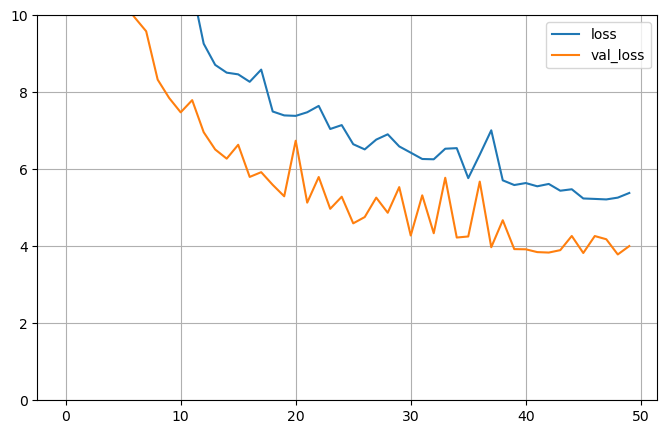

In [107]:
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(opti_histori.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10) 
plt.show()

### Classification

In [111]:
#Load fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) =fashion_mnist.load_data()

In [112]:
#Shape
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

In [113]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [114]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


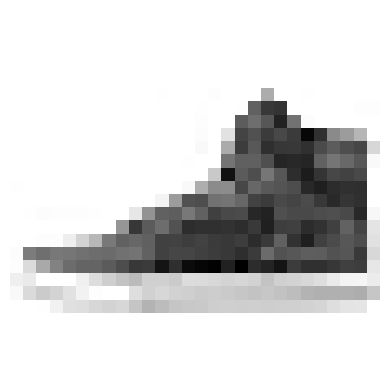

In [116]:
#Afficher une image
plt.imshow(X_train[20], cmap="binary")
plt.axis('off')
plt.show()

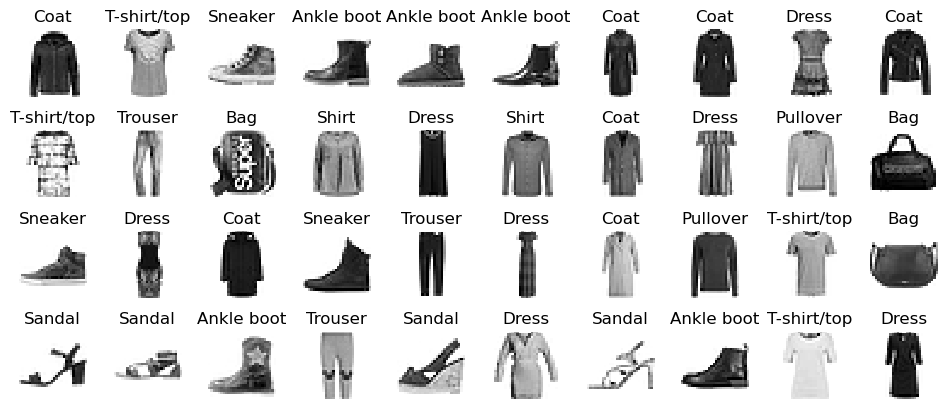

In [117]:
# Afficher un échantillon des images

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [118]:
#A lancer avant la modélisation pour supprimer les anciens modèles en arrière plan
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [119]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [120]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer="sgd",
              metrics=["accuracy"])

In [121]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7214 - accuracy: 0.7658 - val_loss: 0.5158 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4854 - accuracy: 0.8301 - val_loss: 0.4400 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4402 - accuracy: 0.8444 - val_loss: 0.5246 - val_accuracy: 0.8050
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4141 - accuracy: 0.8552 - val_loss: 0.3966 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3960 - accuracy: 0.8611 - val_loss: 0.3777 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3781 - accuracy: 0.8665 - val_loss: 0.3754 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3662 - accuracy: 0.8713 - val_loss: 0.3699 - val_accuracy

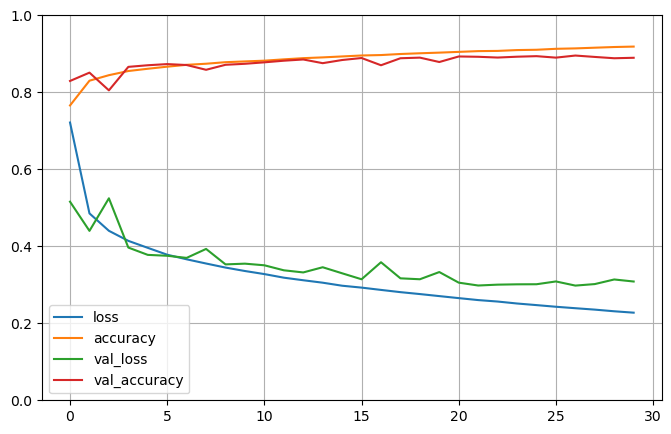

In [122]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [123]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 77.3350 - accuracy: 0.8296


[77.33497619628906, 0.8295999765396118]

In [189]:
X_new = X_test[:12]
y_proba = model.predict(X_new)
print(y_proba)

1/1 [==============================] - 0s 18ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.03234363e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00

In [190]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5], dtype=int64)

In [191]:
name_pred = np.array(class_names)[y_pred]

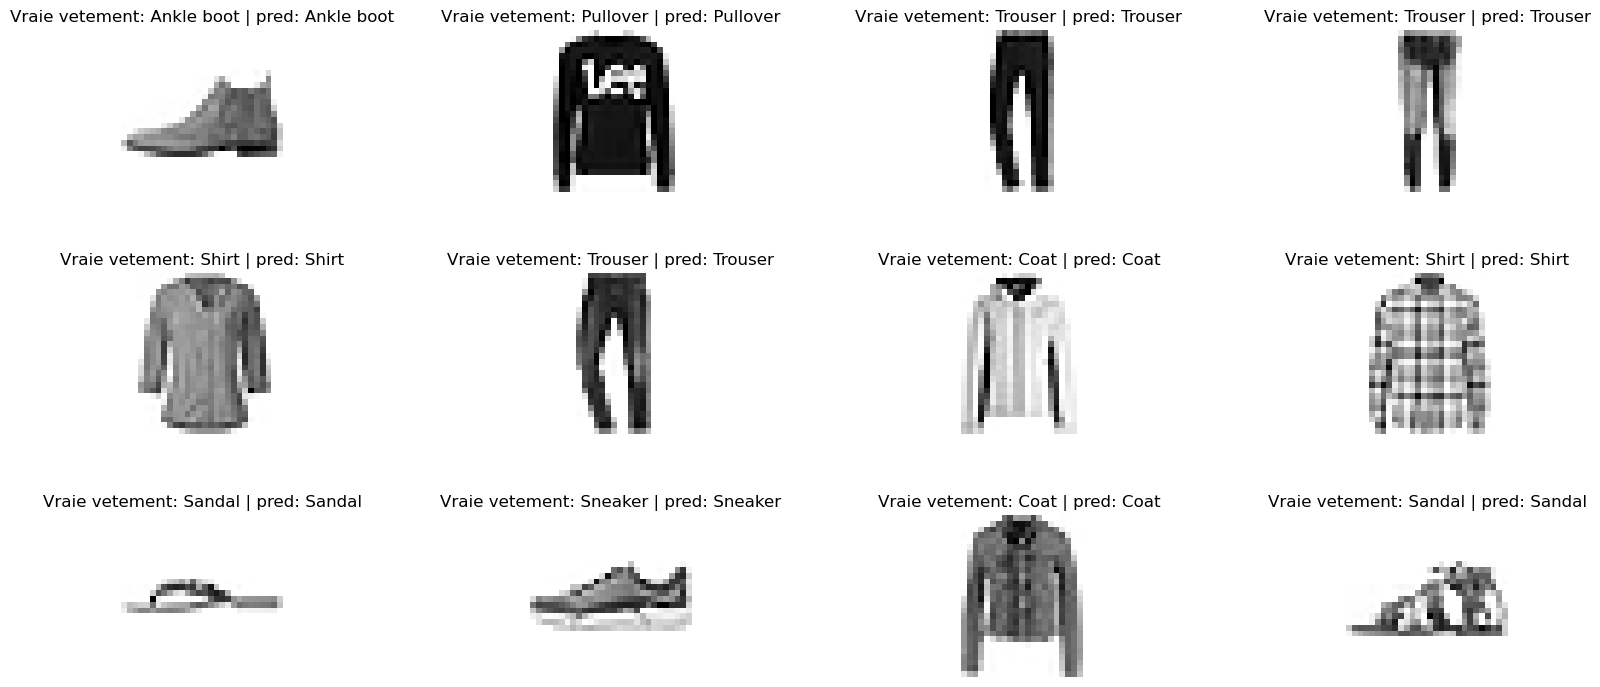

In [192]:
plt.figure(figsize=(20.2, 8.4))
for index, image in enumerate(X_new):
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title('Vraie vetement: ' + class_names[y_test[index]] + ' | pred: ' +str(name_pred[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [193]:
y_pred_full = np.argmax(model.predict(X_test), axis=-1)
y_pred_full

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [196]:
np.where(y_pred_full!=y_test)[0][0:10]

array([12, 17, 23, 29, 40, 42, 43, 44, 45, 49], dtype=int64)

In [214]:
def plot_img(choose_img, X) :
    plt.imshow(X[choose_img].reshape(28,28), cmap='gray')
    plt.title("Cette image est :" + str(np.array(class_names)[y_valid][choose_img]) + ' | on predit : ' +str(np.array(class_names)[y_pred_full][choose_img]))

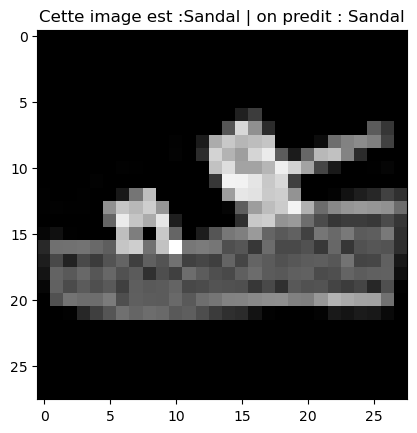

In [216]:
plot_img(choose_img = 12 , X =X_valid )